In [1]:
using Distributions
using Random
using StatsBase
using StatsPlots

function plot_sim(dist, n; μ=mean(dist), L=10^6, D=TDist(n-1))
    testname = D == TDist(n-1) ? "t-test, " : D == Normal() ? "no correction, " : ""
    distname = replace(string(dist), r"{[^}]*}"=>"")
    pval = Vector{Float64}(undef, L)
    Xtmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(dist, Xtmp[tid])
        X̄ = mean(X)
        S = std(X)
        T = √n * (X̄ - μ) / S
        pval[i] = 2ccdf(D, abs(T))
    end
    _ecdf = ecdf(pval)
    f(x) = _ecdf(x)
    println("n = $n => coverage probability (α=5%) = ", 1 - f(0.05))
    plot(f, 0, 0.1; label="")
    plot!(identity; label="", c=:grey, ls=:dash)
    plot!(xtick=0:0.01:1, ytick=0:0.01:1, xrotation=30)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    title!("$testname$distname, n=$n", titlefontsize=10)
    plot!(size=(400, 420))
end

function plot_sims(dist; ns=(5, 10, 20, 100), correction=true)
    PP = []
    for n in ns
        D = correction ? TDist(n-1) : Normal()
        P = plot_sim(dist, n; D)
        push!(PP, P)
    end
    println()
    plot(PP...; size=(800, 840))
end

plot_sims (generic function with 1 method)

n = 5 => coverage probability (α=5%) = 0.878338
n = 10 => coverage probability (α=5%) = 0.918223
n = 20 => coverage probability (α=5%) = 0.934967
n = 100 => coverage probability (α=5%) = 0.946996



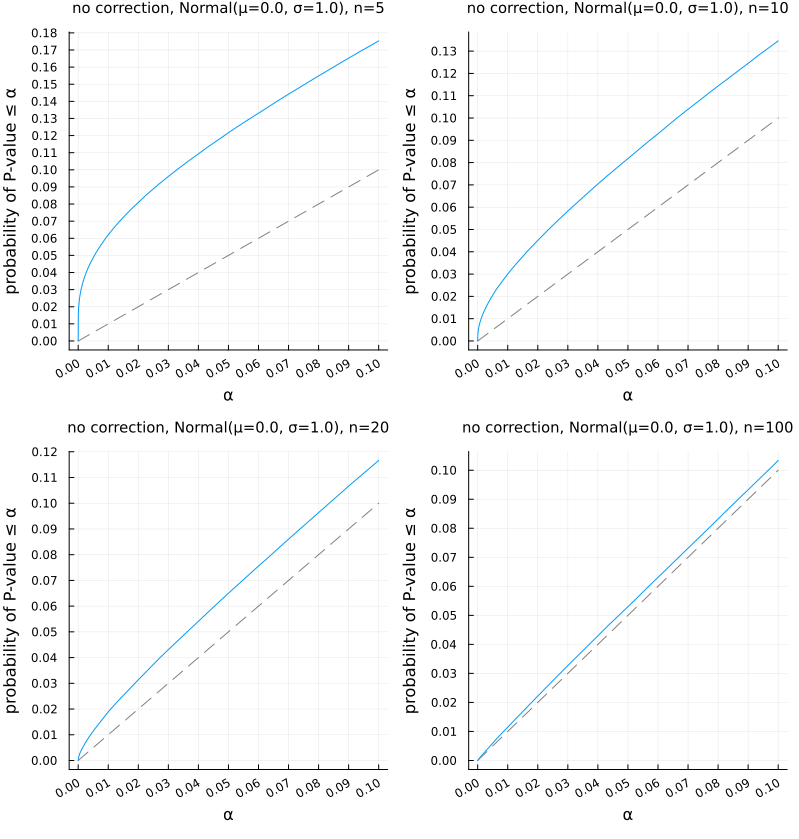

In [2]:
plot_sims(Normal(); ns=(5, 10, 20, 100), correction=false)

n = 5 => coverage probability (α=5%) = 0.950011
n = 10 => coverage probability (α=5%) = 0.9501310000000001
n = 20 => coverage probability (α=5%) = 0.949887
n = 100 => coverage probability (α=5%) = 0.95008



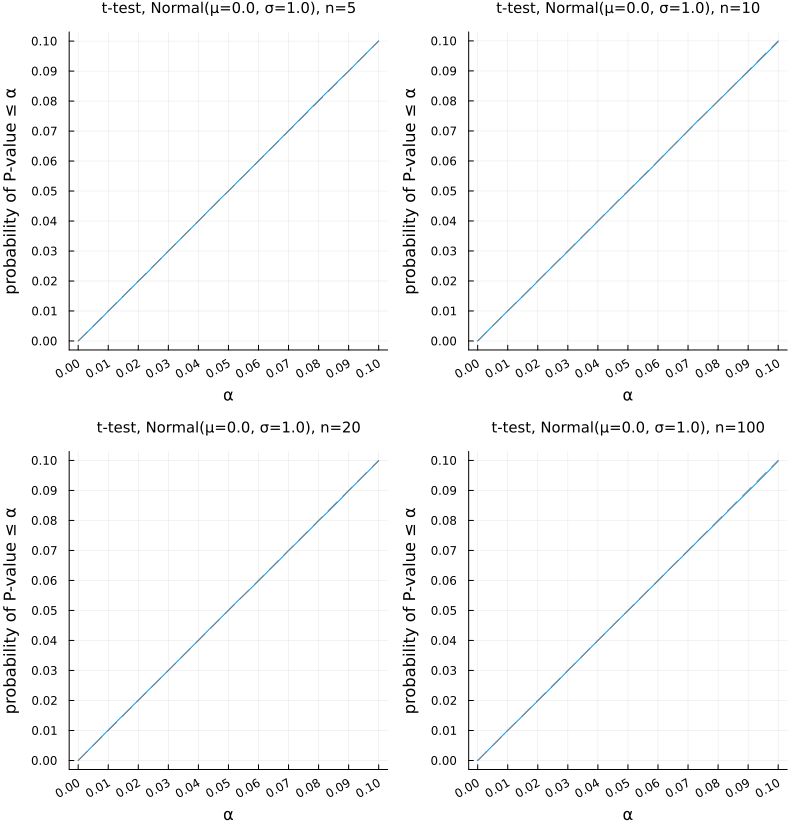

In [3]:
plot_sims(Normal(); ns=(5, 10, 20, 100))

n = 5 => coverage probability (α=5%) = 0.869798
n = 10 => coverage probability (α=5%) = 0.915847
n = 20 => coverage probability (α=5%) = 0.93433
n = 100 => coverage probability (α=5%) = 0.946918



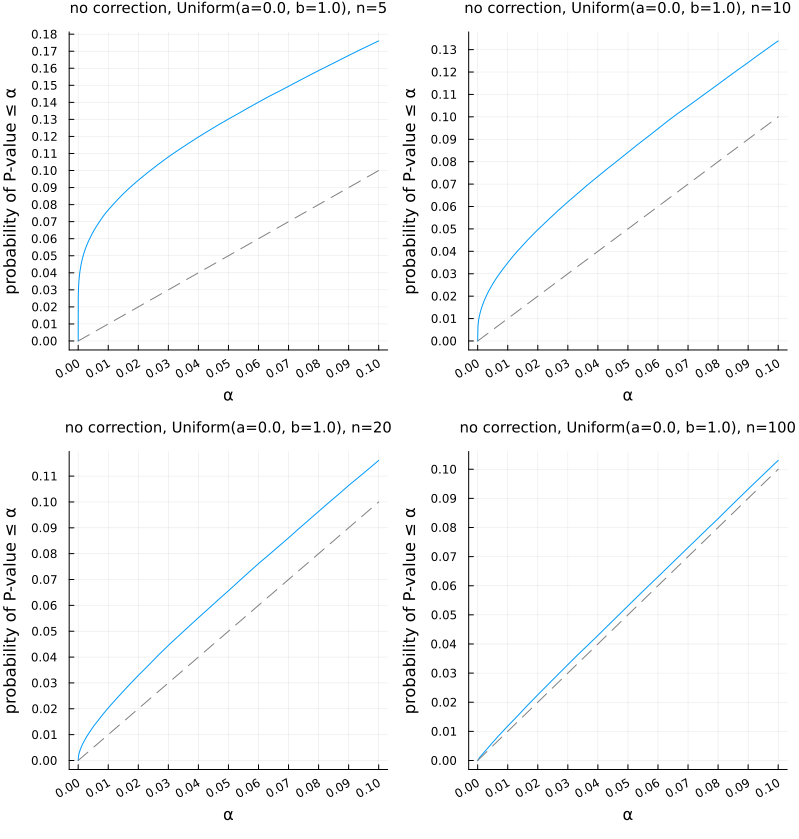

In [4]:
plot_sims(Uniform(); ns=(5, 10, 20, 100), correction=false)

n = 5 => coverage probability (α=5%) = 0.933893
n = 10 => coverage probability (α=5%) = 0.94626
n = 20 => coverage probability (α=5%) = 0.948497
n = 100 => coverage probability (α=5%) = 0.949992



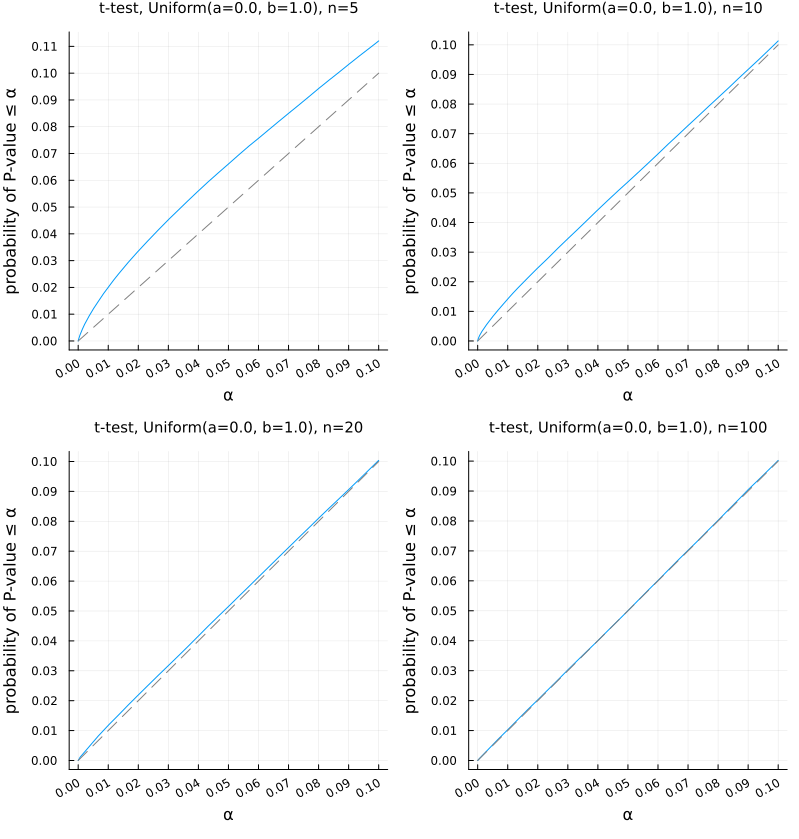

In [5]:
plot_sims(Uniform(); ns=(5, 10, 20, 100))

n = 5 => coverage probability (α=5%) = 0.812037
n = 10 => coverage probability (α=5%) = 0.869999
n = 20 => coverage probability (α=5%) = 0.90474
n = 100 => coverage probability (α=5%) = 0.938745



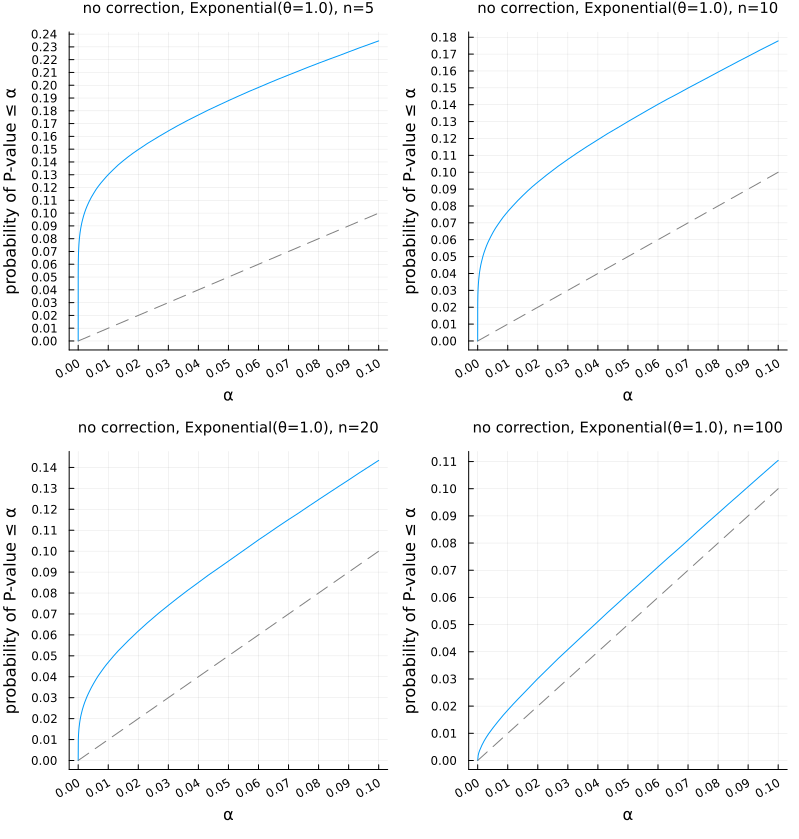

In [6]:
plot_sims(Exponential(); ns=(5, 10, 20, 100), correction=false)

n = 5 => coverage probability (α=5%) = 0.883022
n = 10 => coverage probability (α=5%) = 0.900469
n = 20 => coverage probability (α=5%) = 0.918717
n = 100 => coverage probability (α=5%) = 0.9415830000000001



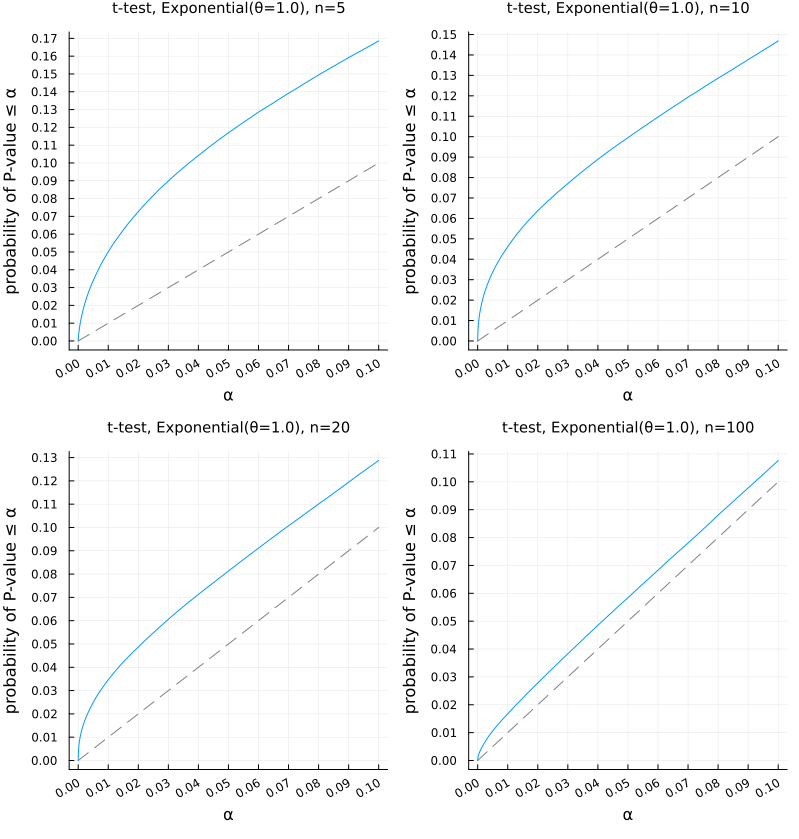

In [7]:
plot_sims(Exponential(); ns=(5, 10, 20, 100))

n = 100 => coverage probability (α=5%) = 0.94177
n = 200 => coverage probability (α=5%) = 0.945818
n = 500 => coverage probability (α=5%) = 0.948163
n = 1000 => coverage probability (α=5%) = 0.949319



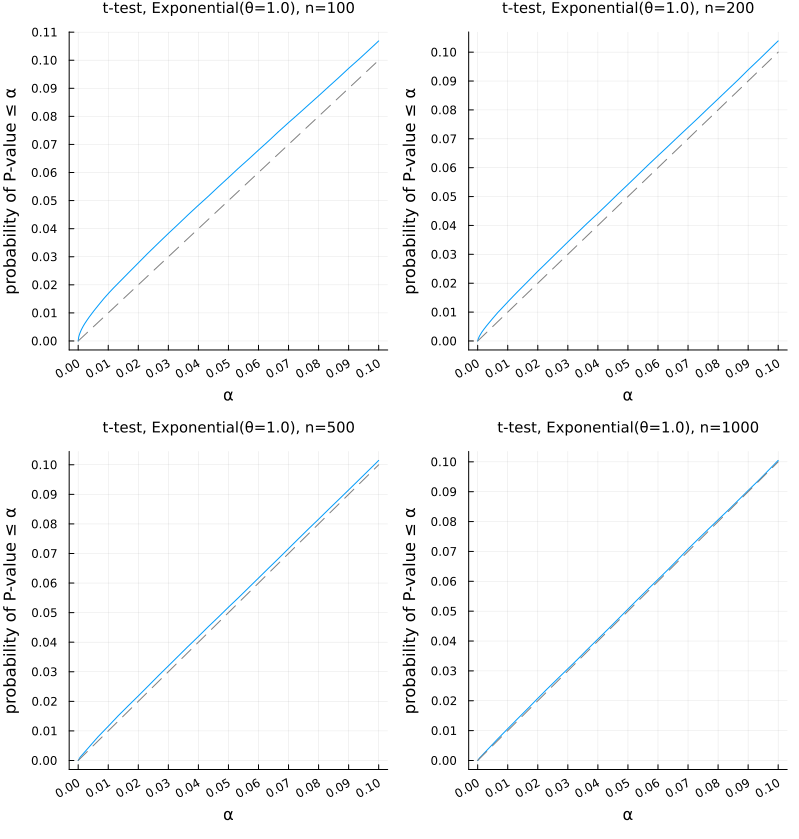

In [8]:
plot_sims(Exponential(); ns=(100, 200, 500, 1000))